In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
svm = SVC()
svm.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
print(svm.score(X_test_scaled, y_test))

0.972027972027972


In [7]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
print(grid.best_score_)
print(grid.score(X_test_scaled, y_test))
print(grid.best_params_)

0.9812311901504789
0.972027972027972
{'C': 1, 'gamma': 1}


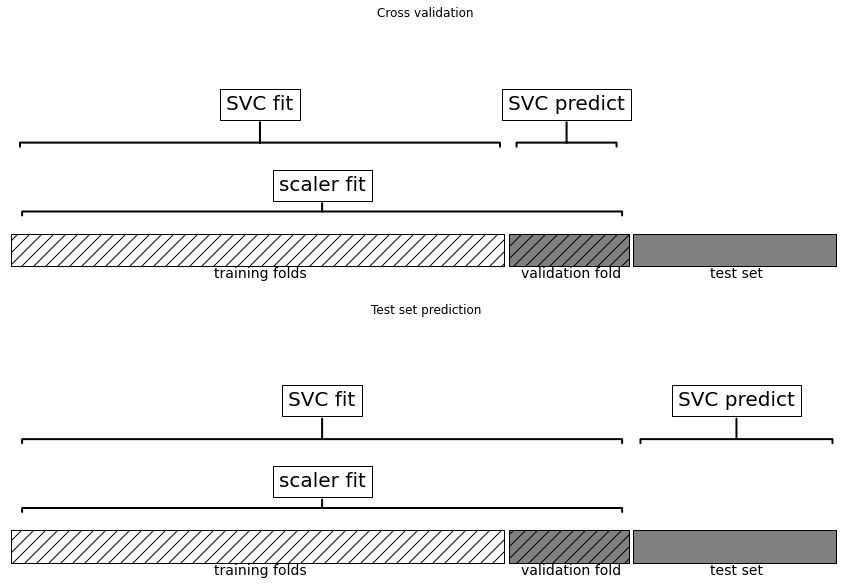

In [6]:
mglearn.plots.plot_improper_processing()

In [8]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler', MinMaxScaler()), ('svm', SVC())])

In [9]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('svm', SVC())])

In [10]:
print('テストデータに対するスコア：{}'.format(pipe.score(X_test, y_test)))

テストデータに対するスコア：0.972027972027972


In [13]:
param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100], 'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
print('最良の交差検証精度: {}'.format(grid.best_score_))
print(grid.score(X_test, y_test))
print(grid.best_params_)

最良の交差検証精度: 0.9812311901504789
0.972027972027972
{'svm__C': 1, 'svm__gamma': 1}
